In [63]:
## Importing required libraries
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from time import time
from sklearn.decomposition import PCA, FastICA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

warnings.simplefilter("ignore")

In [64]:
df_mat = pd.read_csv('student-mat.csv')
df_mat.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [65]:
df_por = pd.read_csv('student-por.csv')
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [66]:
df = pd.concat([df_por, df_mat])
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [67]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [68]:
duplicates = df[df.duplicated(subset=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep='first')]
duplicates

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
161,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,3,3,2,2,1,5,16,9,9,8
195,GP,M,16,U,GT3,T,3,3,services,other,...,4,2,3,1,2,3,0,11,12,13
270,GP,M,16,U,GT3,T,4,4,services,services,...,5,3,2,1,2,5,4,14,15,15
376,GP,F,18,U,GT3,T,1,1,other,other,...,4,5,5,1,2,2,0,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,0,7,5,0
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
389,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,0,6,5,0
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16


In [69]:
df.drop("school", axis=1, inplace=True)
print(df.shape)
df.drop_duplicates()
print(df.shape)

(1044, 32)
(1044, 32)


In [70]:
num_df = df.select_dtypes(exclude=['object'])
cat_df = df.select_dtypes(include=['object'])
num_df.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

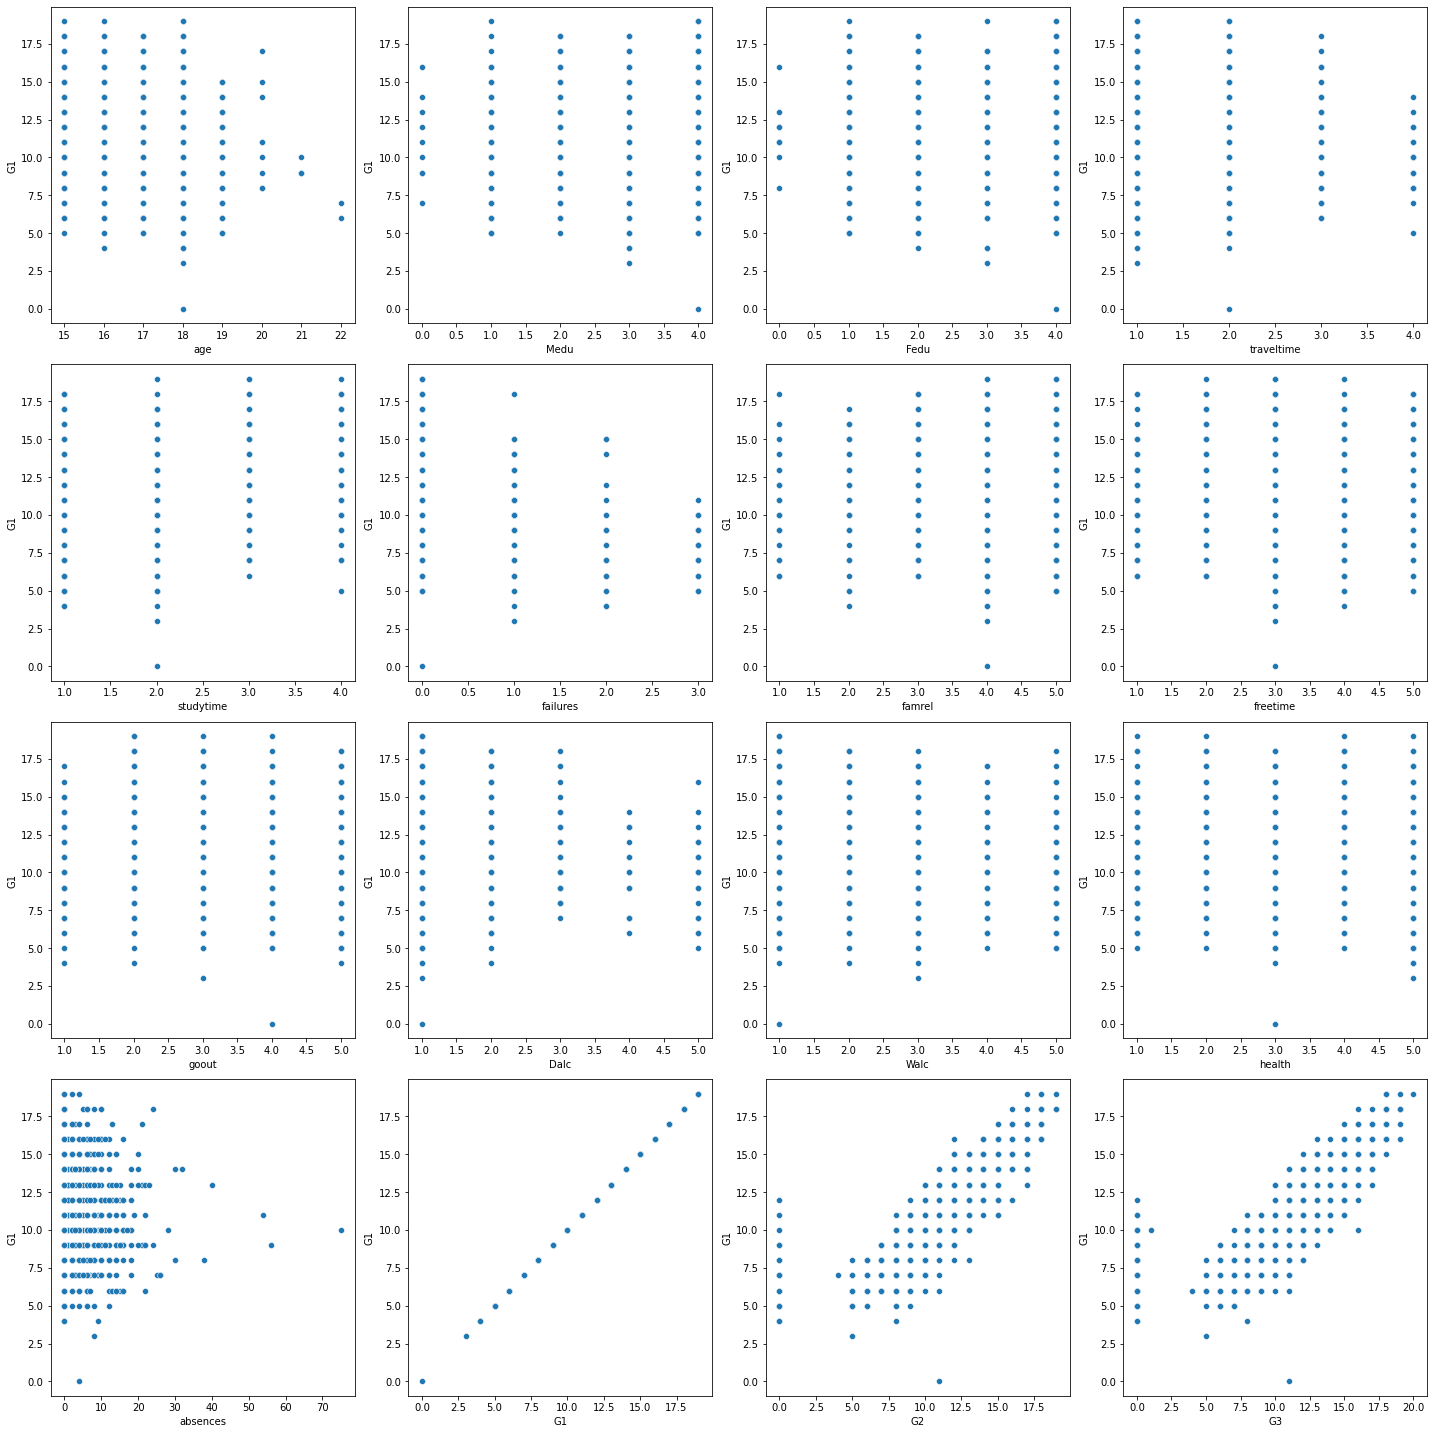

In [71]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G1',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

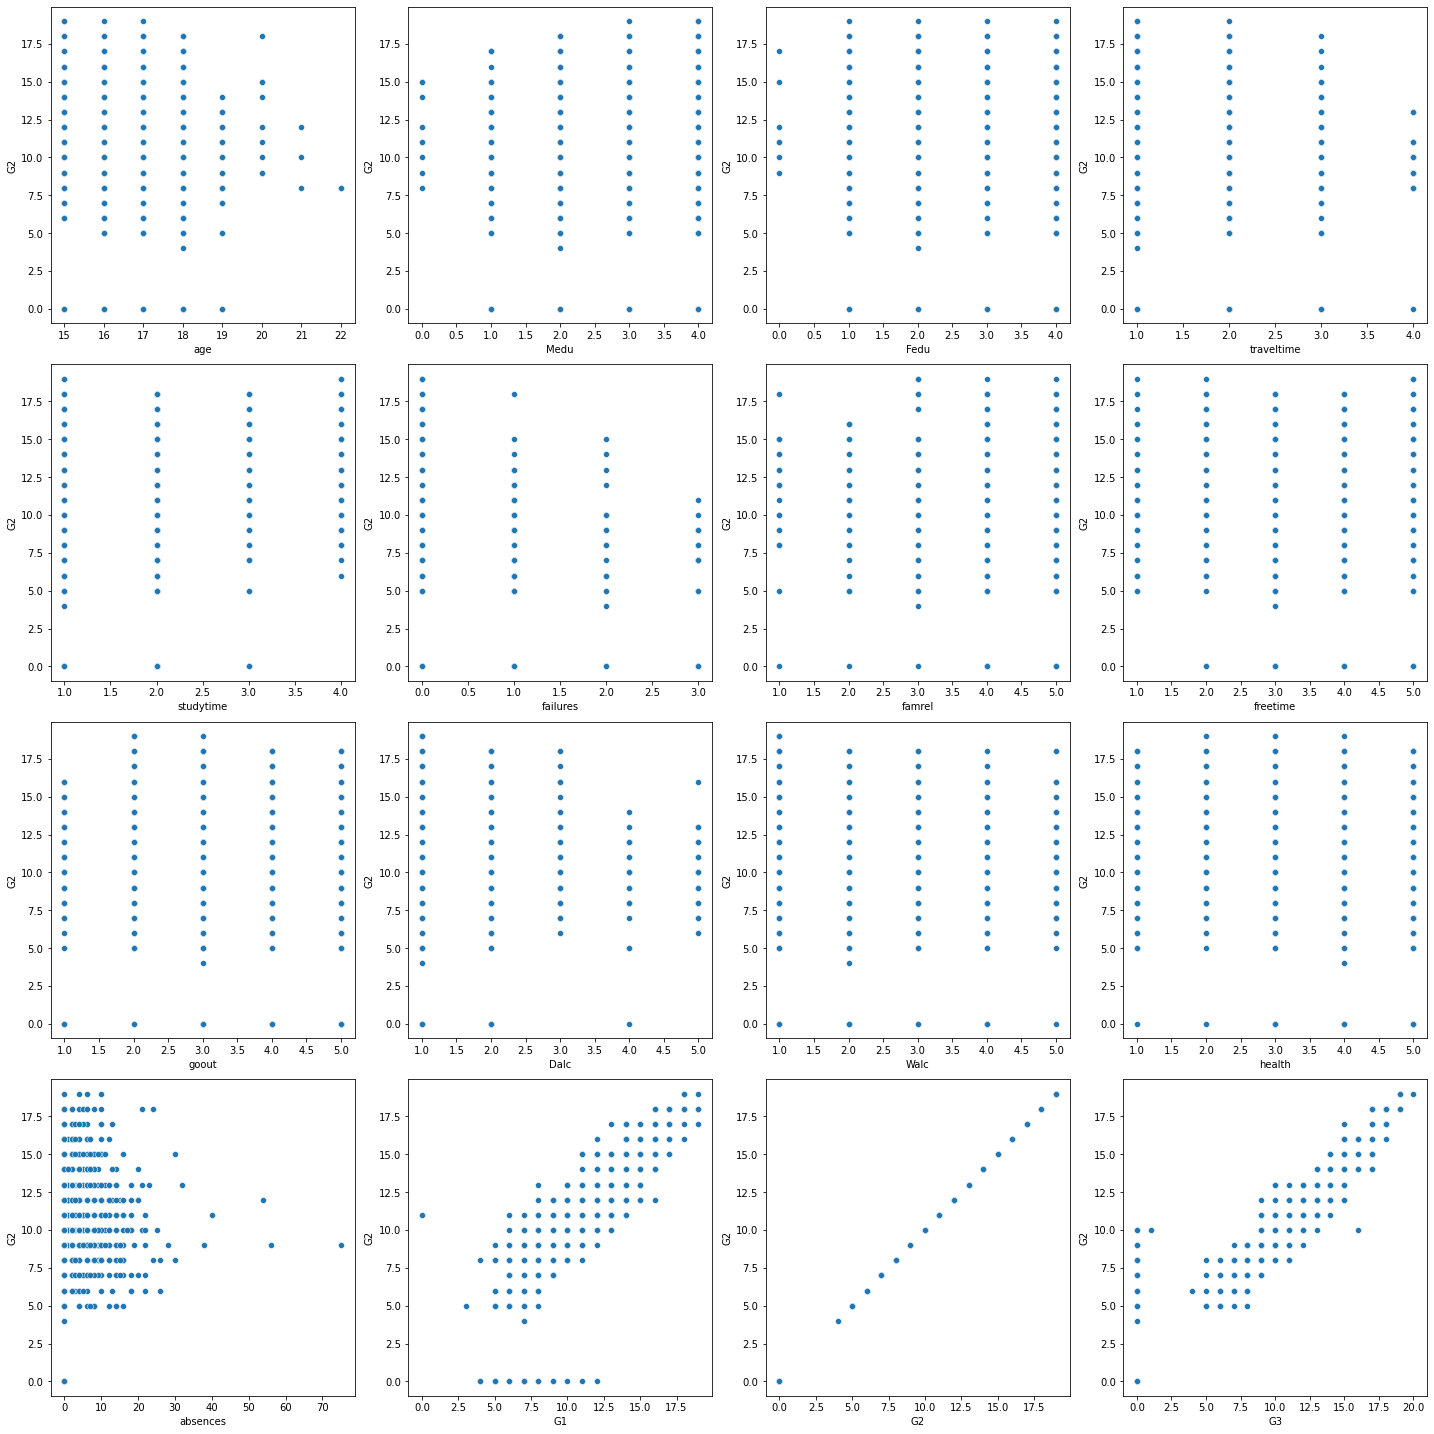

In [72]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G2',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

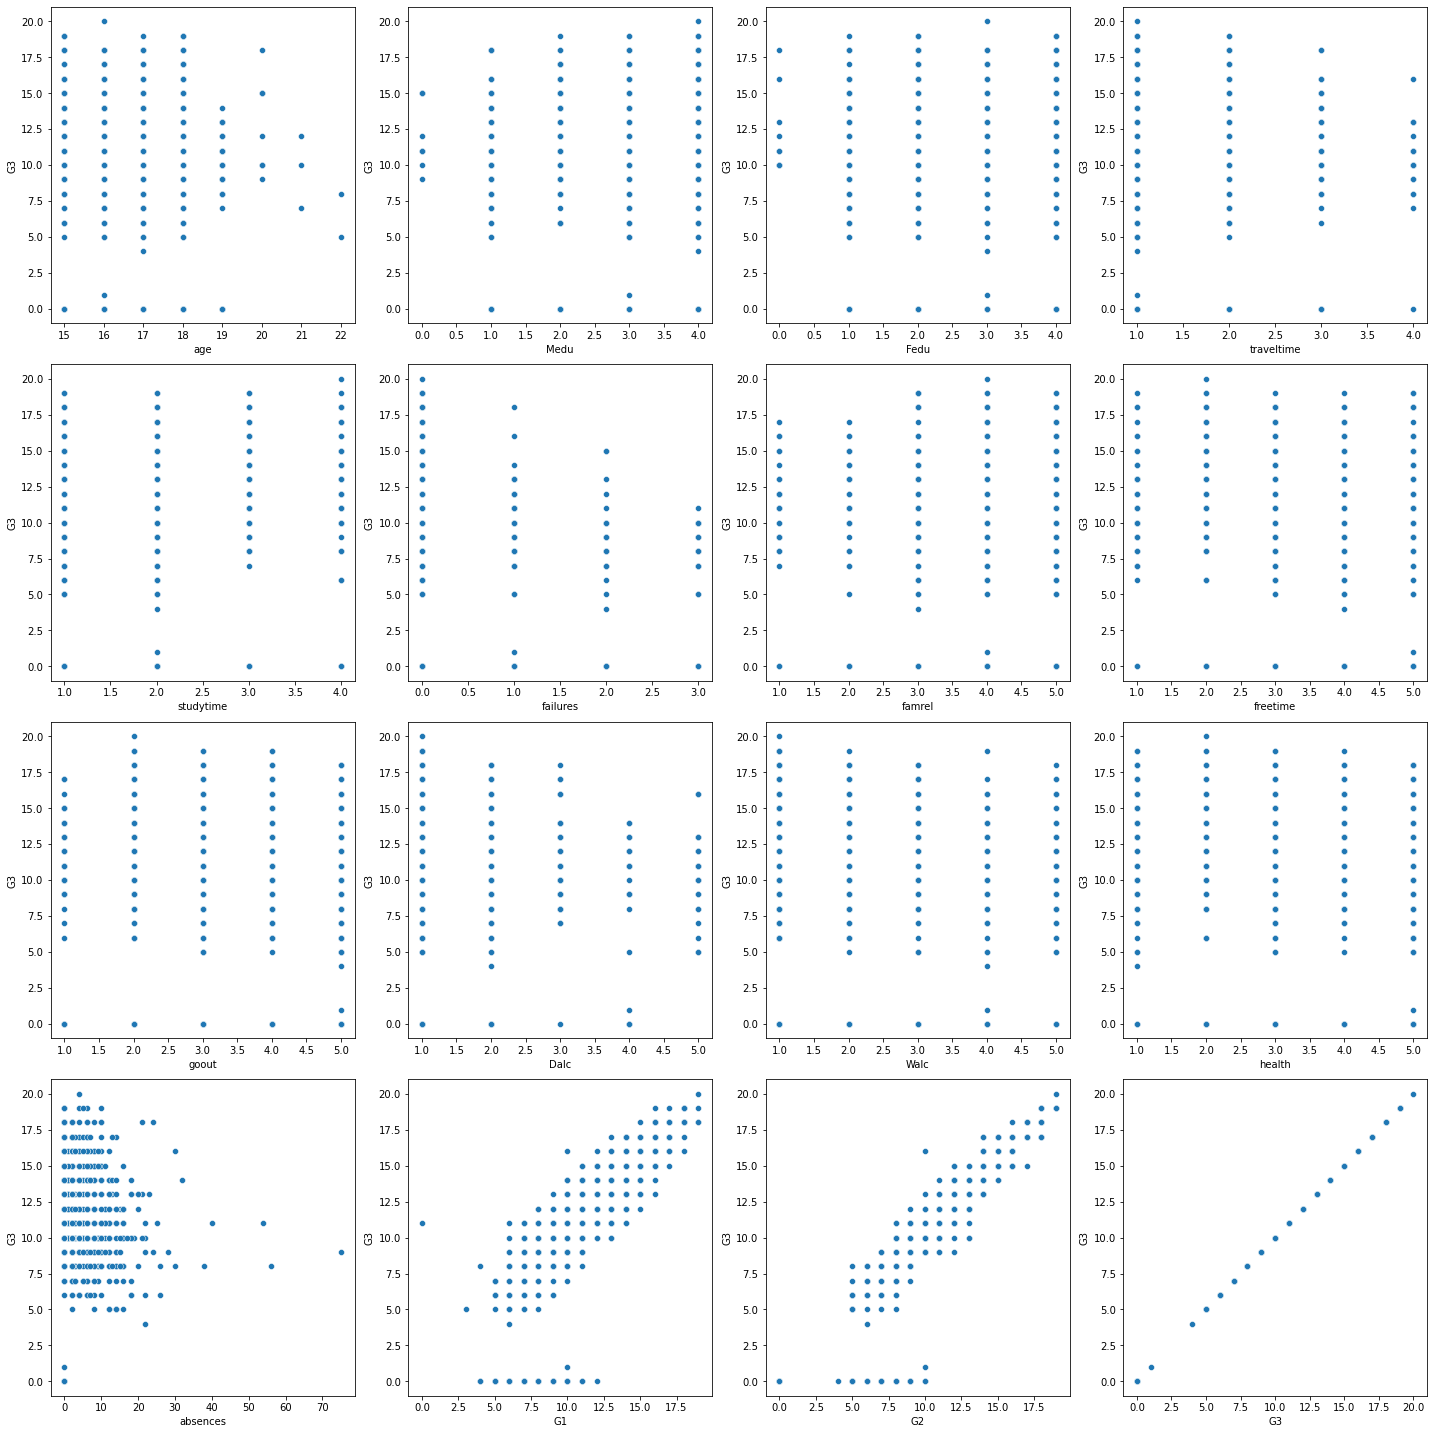

In [73]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='G3',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

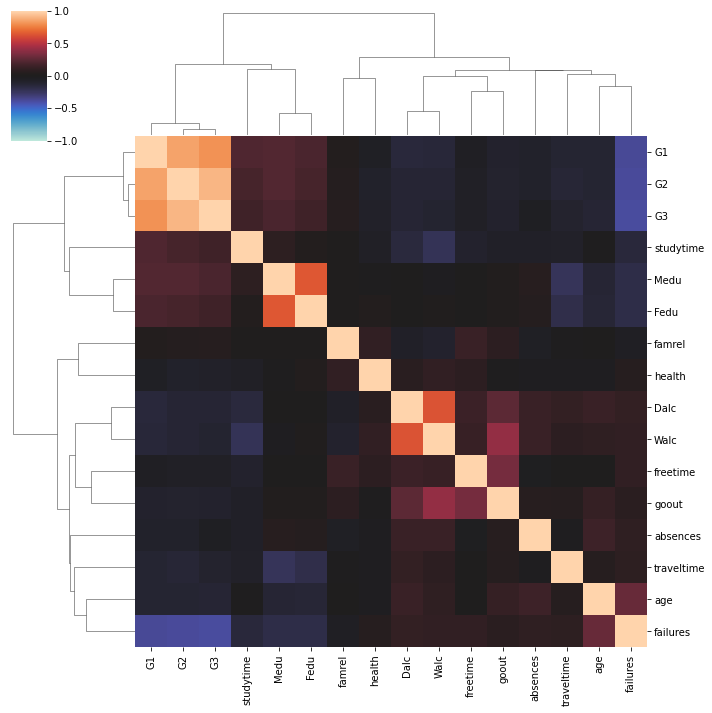

In [74]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(num_df, annot=None)

<AxesSubplot:>

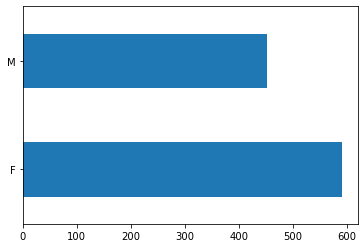

In [75]:
df.sex.value_counts().plot.barh()

In [76]:
label_encoder = LabelEncoder()
categ = ['sex', 'address','famsize','Pstatus','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
df[categ] = df[categ].apply(label_encoder.fit_transform)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,0,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,0,17,1,0,1,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,0,15,1,0,1,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,0,16,1,0,1,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,services,services,course,...,5,5,4,4,5,4,11,9,9,9
391,1,17,1,1,1,3,1,services,services,course,...,2,4,5,3,4,2,3,14,16,16
392,1,21,0,0,1,1,1,other,other,course,...,5,5,3,3,3,3,3,10,8,7
393,1,18,0,1,1,3,2,services,other,course,...,4,4,1,3,4,5,0,11,12,10


In [77]:
df = pd.get_dummies(data =df, columns=["Mjob","Fjob", 'reason','guardian'])
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,1,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,1,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,0,...,1,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,1,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,1,0,2,2,1,2,2,...,0,1,0,1,0,0,0,0,0,1
391,1,17,1,1,1,3,1,2,1,0,...,0,1,0,1,0,0,0,0,1,0
392,1,21,0,0,1,1,1,1,1,3,...,1,0,0,1,0,0,0,0,0,1
393,1,18,0,1,1,3,2,3,1,0,...,1,0,0,1,0,0,0,0,1,0


In [78]:
col = ['age', 'Fedu','traveltime', 'studytime','famrel','freetime', 'goout','Dalc','Walc','health','absences']
df[col]= df[col].apply(lambda x: (x-x.min())/(x.max()-x.min()), axis=0)
df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0.428571,1,0,0,4,1.00,0.333333,0.333333,0,...,0,0,1,1,0,0,0,0,1,0
1,0,0.285714,1,0,1,1,0.25,0.000000,0.333333,0,...,1,0,0,1,0,0,0,1,0,0
2,0,0.000000,1,1,1,1,0.25,0.000000,0.333333,0,...,1,0,0,0,0,1,0,0,1,0
3,0,0.000000,1,0,1,4,0.50,0.000000,0.666667,0,...,0,1,0,0,1,0,0,0,1,0
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,0.714286,1,1,0,2,0.50,0.000000,0.333333,2,...,0,1,0,1,0,0,0,0,0,1
391,1,0.285714,1,1,1,3,0.25,0.333333,0.000000,0,...,0,1,0,1,0,0,0,0,1,0
392,1,0.857143,0,0,1,1,0.25,0.000000,0.000000,3,...,1,0,0,1,0,0,0,0,0,1
393,1,0.428571,0,1,1,3,0.50,0.666667,0.000000,0,...,1,0,0,1,0,0,0,0,1,0


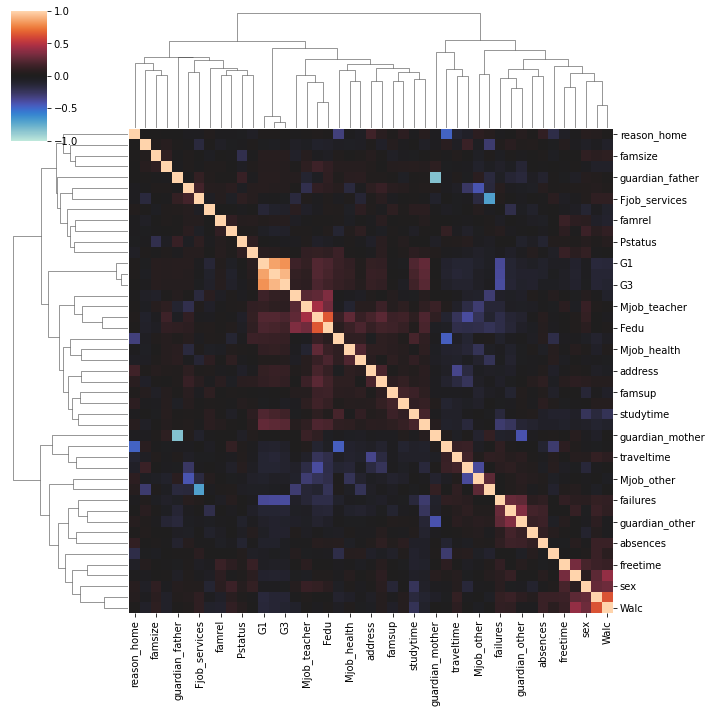

In [79]:
num_df = df.select_dtypes(exclude='object')
corrplot(num_df, annot=None)

In [80]:
X = df.drop(["G1","G2","G3"], axis = 1)
y = df[["G1","G2","G3"]]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=12)
train_df = pd.concat([X_train, y_train])
train_df = X_train
train_df["G1"] = y_train["G1"]
train_df["G2"] = y_train["G2"]
train_df["G3"] = y_train["G3"]
test_df = pd.concat([X_test, y_test])

In [81]:
train_df

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3
15,0,0.142857,1,0,1,4,1.00,0.000000,0.000000,0,...,0,1,0,0,0,1,0,14,14,14
398,0,0.428571,1,0,1,2,0.75,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
70,1,0.142857,1,0,1,3,0.25,0.333333,1.000000,0,...,0,0,0,1,1,0,0,13,15,15
292,0,0.285714,0,0,1,4,0.50,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,0,1,0,0,1,0,0,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1,0.428571,0,0,1,2,0.75,0.000000,0.000000,0,...,0,0,0,1,1,0,0,13,14,14
473,1,0.142857,1,1,1,2,0.25,0.333333,0.000000,0,...,1,0,0,0,0,1,0,10,8,10
49,0,0.000000,1,0,1,4,1.00,0.000000,0.333333,0,...,0,0,1,0,1,0,0,13,12,12
278,1,0.285714,1,0,1,2,0.75,0.333333,0.000000,0,...,1,0,0,0,1,0,0,9,12,13


In [82]:
print(X_train.shape)
X_train.head()

(783, 45)


,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3
15,0,0.142857,1,0,1,4,1.00,0.000000,0.000000,0,...,0,1,0,0,0,1,0,14,14,14
398,0,0.428571,1,0,1,2,0.75,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
70,1,0.142857,1,0,1,3,0.25,0.333333,1.000000,0,...,0,0,0,1,1,0,0,13,15,15
292,0,0.285714,0,0,1,4,0.50,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,0,1,0,0,1,0,0,6,10,10


In [83]:
print(y_test.shape)
y_test.head()

(261, 3)


,G1,G2,G3
190,13,12,14
176,8,9,10
381,15,14,15
167,14,15,16
106,10,10,10


In [84]:
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df

,index,0
0,sex,0.0
1,age,0.0
2,address,0.0
3,famsize,0.0
4,Pstatus,0.0
5,Medu,0.0
6,Fedu,0.0
7,traveltime,0.0
8,studytime,0.0
9,failures,0.0


In [85]:
def get_almost_constant_columns(df, dropna=True):
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 > 96:
            cols.append(i)
    return cols

In [86]:
overfit_cat = get_almost_constant_columns(cat_df)
overfit_cat

[]

In [87]:
overfit_num = get_almost_constant_columns(num_df, dropna=True)
overfit_num

['Fjob_health']

In [88]:
train_df = train_df.drop(overfit_num, axis=1)
test_df = test_df.drop(overfit_num, axis = 1)

In [89]:
train_df.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,G1,G2,G3
15,0,0.142857,1,0,1,4,1.00,0.000000,0.000000,0,...,0,1,0,0,0,1,0,14,14,14
398,0,0.428571,1,0,1,2,0.75,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
70,1,0.142857,1,0,1,3,0.25,0.333333,1.000000,0,...,0,0,0,1,1,0,0,13,15,15
292,0,0.285714,0,0,1,4,0.50,0.000000,0.666667,0,...,1,0,0,0,0,1,0,11,12,14
4,0,0.142857,1,0,1,3,0.75,0.000000,0.333333,0,...,0,1,0,0,1,0,0,6,10,10
